In [1]:
using NCDatasets
using PyPlot
using PyCall
const plt = PyPlot
ccrs = pyimport("cartopy.crs")
cfeature = pyimport("cartopy.feature")
coast = cfeature.GSHHSFeature(scale="i")
mpl = pyimport("matplotlib")
mpl.style.use("./fairease.mplstyle")
cmocean = pyimport("cmocean")

PyObject <module 'cmocean' from '/home/ctroupin/.julia/conda/3/x86_64/lib/python3.10/site-packages/cmocean/__init__.py'>

In [2]:
theproj = ccrs.EuroPP()
datacrs = ccrs.PlateCarree()

PyObject <Projected CRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (unknown)
- N[north]: Northing (unknown)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Equidistant Cylindrical
Datum: unknown
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [3]:
nc = NCDataset("../data/NorthAdriatic_bathy.nc", "r")
lonb = nc["lon"][:]
latb = nc["lat"][:]
bathy = nc["bat"][:,:]
close(nc)

closed Dataset

In [19]:
bathy2plot1 = copy(bathy);
bathy2plot2 = copy(bathy);

bathy2plot1[bathy2plot1.>=0] .= 0;
bathy2plot2[bathy2plot1.<0] .= 0;

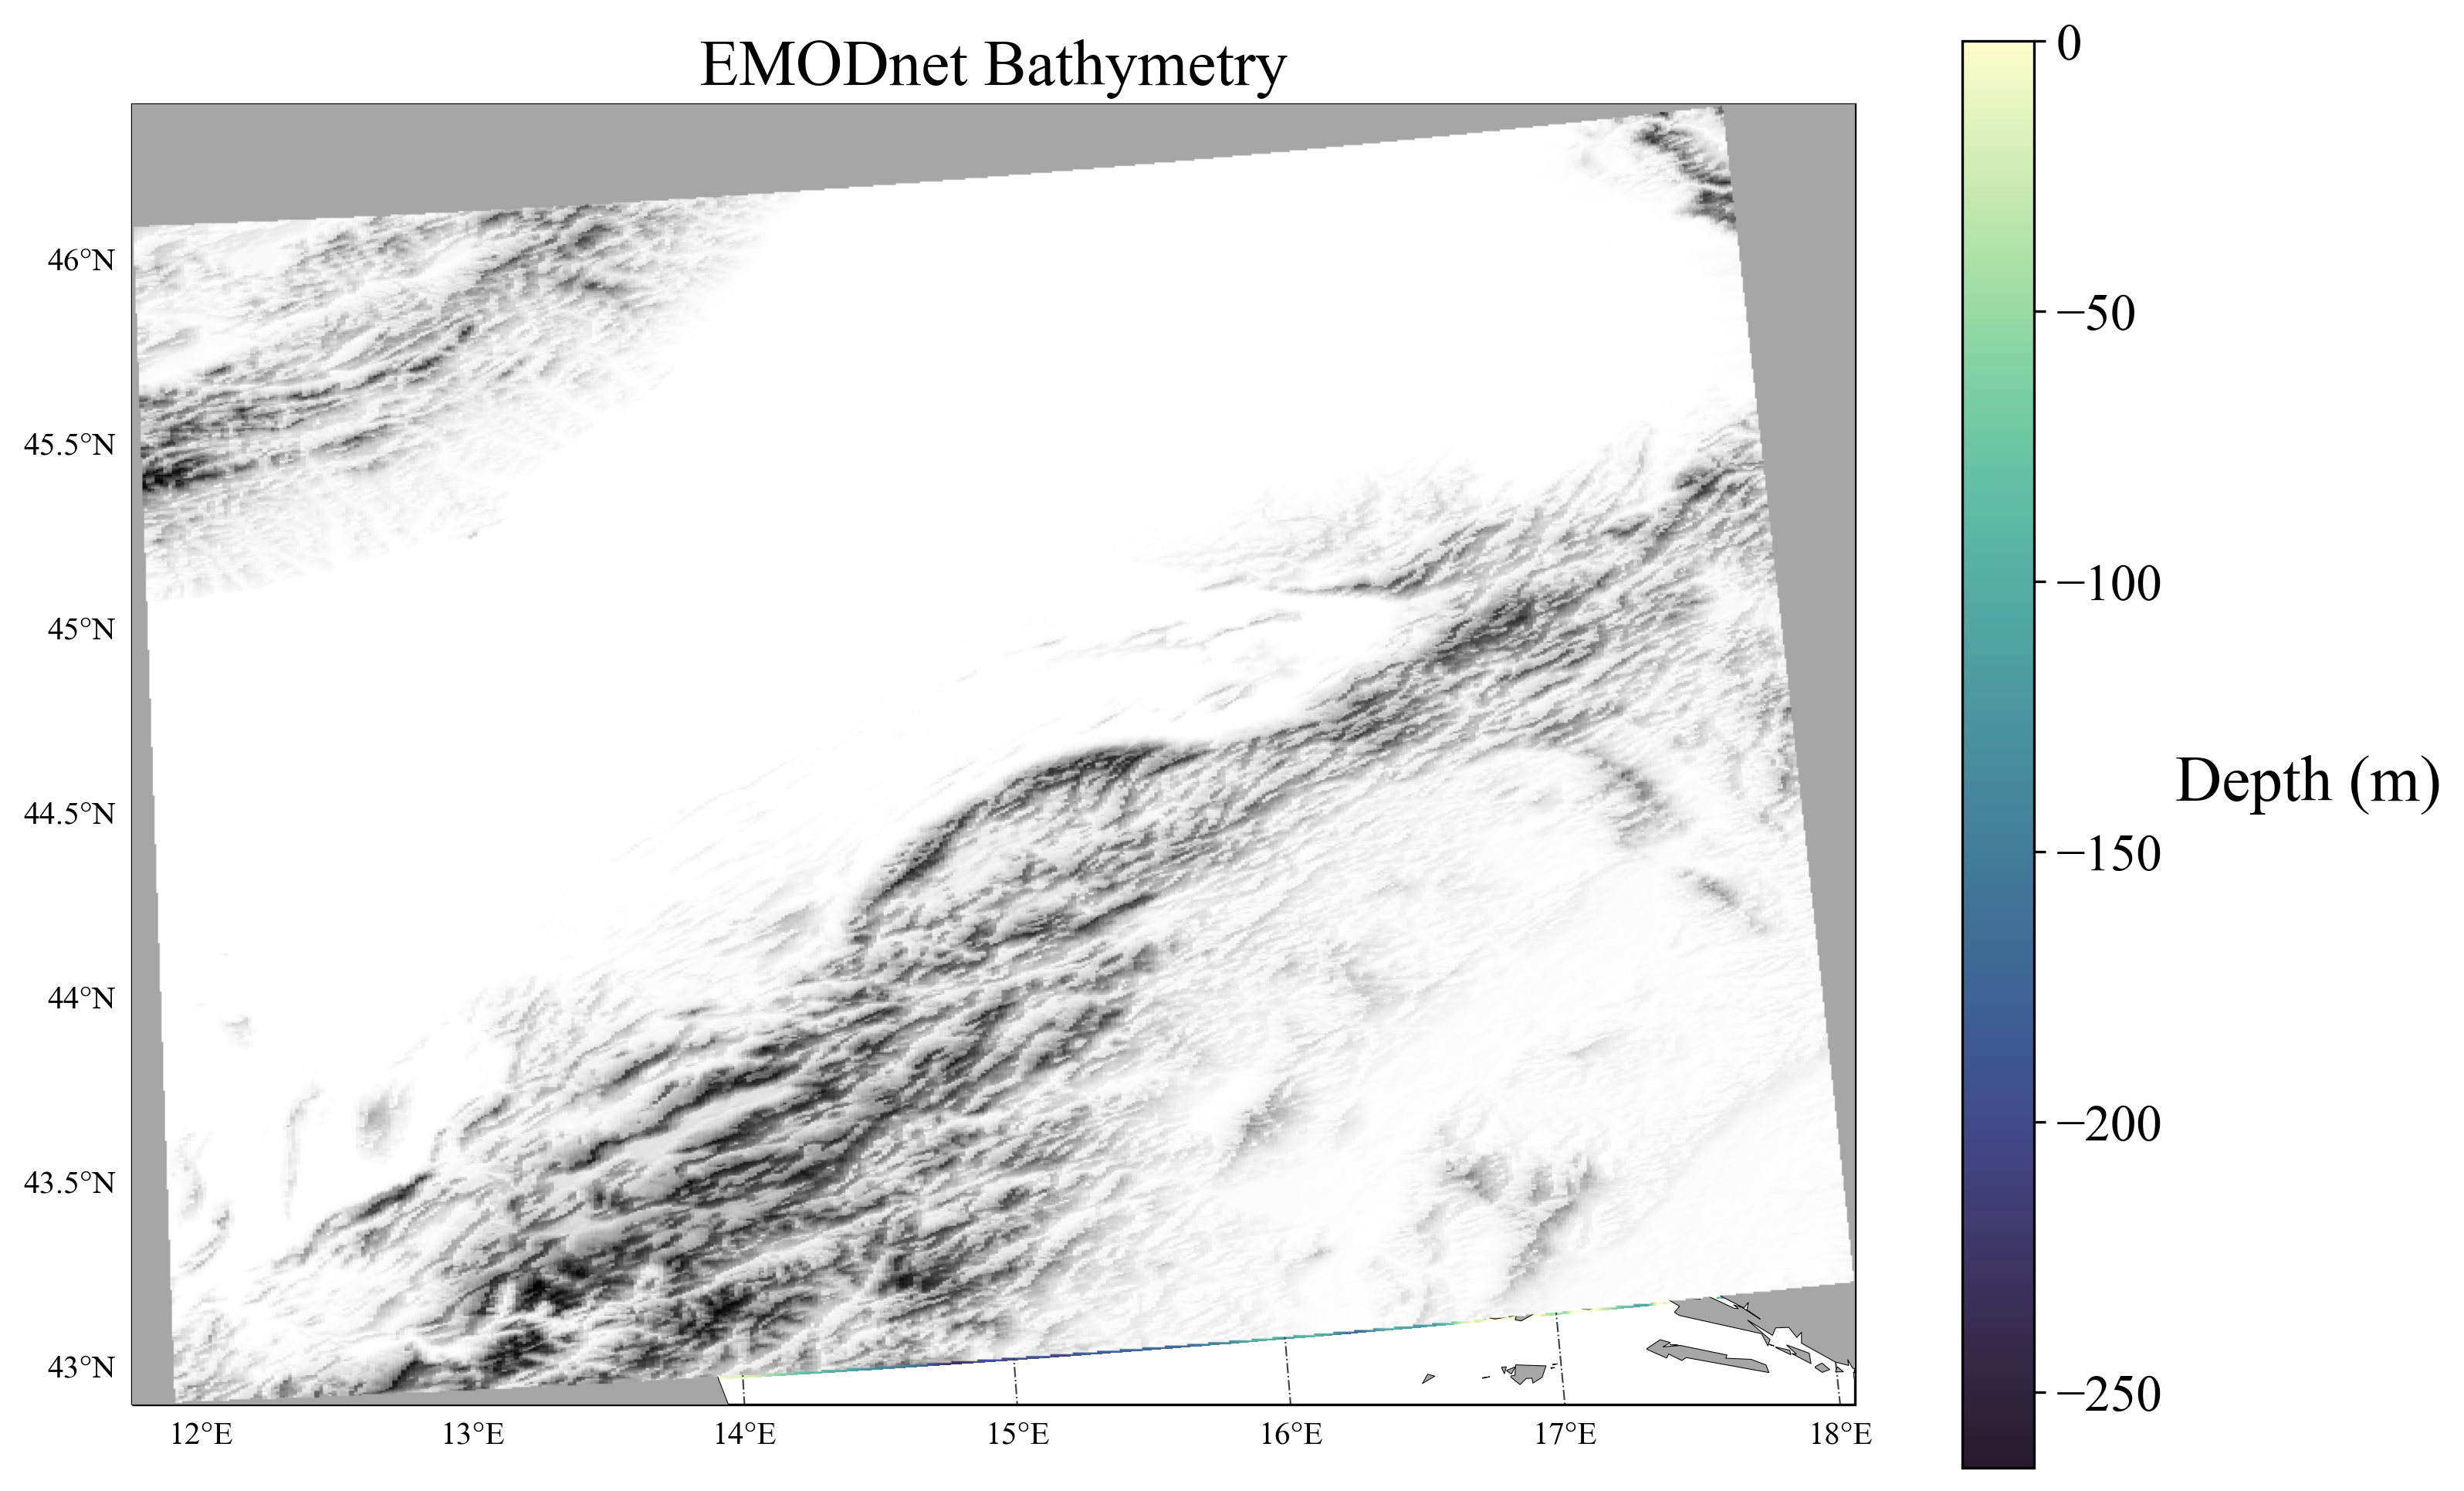

PyObject Text(0.5, 1.0, 'EMODnet Bathymetry')

In [25]:
fig = plt.figure()
ax = plt.subplot(111, projection=theproj)
pcm = ax.pcolormesh(lonb, latb, bathy2plot1', transform=datacrs, cmap=cmocean.cm.deep_r)
cb = plt.colorbar(pcm)
cb.set_label("Depth (m)", rotation=0, ha="left")
gl = ax.gridlines(draw_labels=true, linewidth=.5, color=".25", linestyle="-.", zorder=2)
ax.imshow(shadedtopo, extent=[minimum(lonb), maximum(lonb), minimum(latb), maximum(latb)], 
transform=datacrs, zorder=5)
gl.top_labels = false
gl.right_labels = false
#ax.add_feature(coast, linewidth=0.25, facecolor=".65", zorder=3)
ax.set_title("EMODnet Bathymetry")

In [15]:
mpl = pyimport("matplotlib")
ls = mpl.colors.LightSource(azdeg=315, altdeg=45)
cmap = plt.cm.Greys

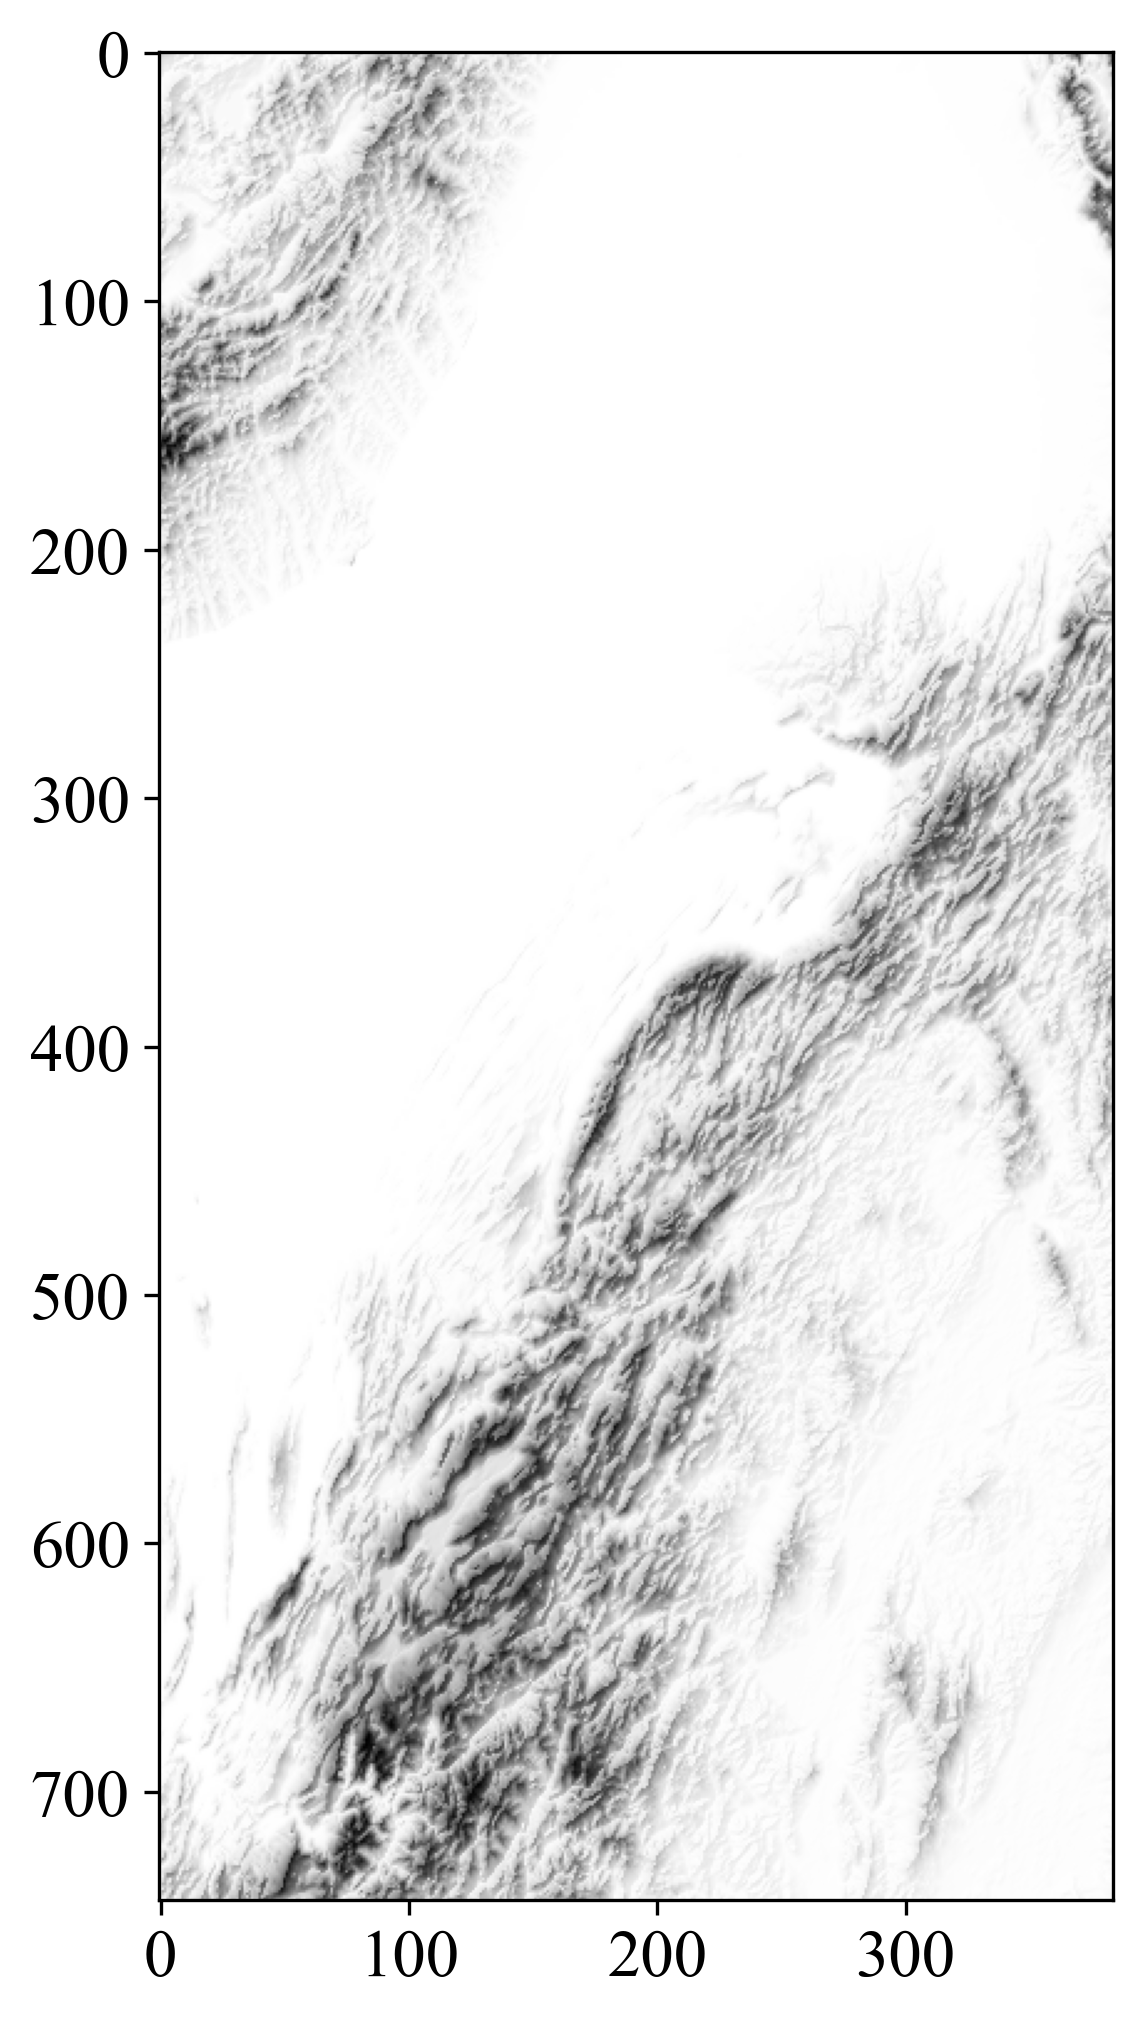

PyObject <matplotlib.image.AxesImage object at 0x785630b11bd0>

In [20]:
shadedtopo = ls.shade(bathy2plot2, cmap=cmap, blend_mode="soft", vert_exag=0.1);
plt.imshow(shadedtopo)